## EDA - Exploratory Data Analysis

En esta etapa del proyecto, se llevara a cabo el analisis exploratorio de los datos. Haremos un analisis exahustivo de los datasets, y así, podremos decidir que variables utilizar para nuestro modelo de recomendación.

#### Importación de librerias

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from wordcloud import WordCloud
import FuncionesExtra as f

import warnings
warnings.filterwarnings("ignore")

#### Lectura de los datasets

In [3]:
steam_games = pd.read_csv('../steam_games_limpio.csv')

user_reviews = pd.read_csv('../user_reviews_limpio.csv')

user_items = pd.read_csv('../user_items_limpio.csv')

sentiment_analysis = pd.read_csv('../sentiment_analysis.csv')

#### EDA dataset **steam_games**

Dataset que contiene la información de los items de Steam

Información general:

In [4]:
steam_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74834 entries, 0 to 74833
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   publisher     59193 non-null  object 
 1   app_name      74831 non-null  object 
 2   title         72783 non-null  object 
 3   url           74834 non-null  object 
 4   tags          74649 non-null  object 
 5   reviews_url   74833 non-null  object 
 6   specs         73893 non-null  object 
 7   price         74834 non-null  float64
 8   early_access  74834 non-null  float64
 9   item_id       74833 non-null  float64
 10  developer     71355 non-null  object 
 11  release_year  72624 non-null  float64
 12  genres        71551 non-null  object 
dtypes: float64(4), object(9)
memory usage: 7.4+ MB


Vemos el porcentaje de nulos por columna:

In [5]:
f.porcentaje_valores_nulos(steam_games)

La columna publisher tiene un  20.90 % de valores nulos
La columna app_name tiene un  0.00 % de valores nulos
La columna title tiene un  2.74 % de valores nulos
La columna url tiene un  0.00 % de valores nulos
La columna tags tiene un  0.25 % de valores nulos
La columna reviews_url tiene un  0.00 % de valores nulos
La columna specs tiene un  1.26 % de valores nulos
La columna price tiene un  0.00 % de valores nulos
La columna early_access tiene un  0.00 % de valores nulos
La columna item_id tiene un  0.00 % de valores nulos
La columna developer tiene un  4.65 % de valores nulos
La columna release_year tiene un  2.95 % de valores nulos
La columna genres tiene un  4.39 % de valores nulos


Ninguna tiene un porcentaje tan alto como para eliminarla.

Estadistica descriptiva tanto de variables númericas como de variables categoricas:

In [10]:
steam_games.describe(include='all')

,publisher,app_name,title,url,tags,reviews_url,specs,price,early_access,item_id,developer,release_year,genres
count,59193,74831,72783,74834,74649,74833,73893,74834.000000,74834.000000,7.483300e+04,71355,72624.000000,71551
unique,8236,32094,30054,32133,15395,32132,4649,NaN,NaN,NaN,10992,NaN,22
top,KISS ltd,AutoTileSet,AutoTileSet,http://store.steampowered.com/app/313320/AutoT...,"['Casual', 'Simulation']",http://steamcommunity.com/app/313320/reviews/?...,['Single-player'],NaN,NaN,NaN,Ubisoft - San Francisco,NaN,Indie
freq,807,11,11,11,2581,11,6298,NaN,NaN,NaN,2516,NaN,15858
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.405883,0.086899,4.662488e+05,NaN,2015.205662,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.923128,0.281689,1.731647e+05,NaN,2.925694,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000e+01,NaN,1970.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.990000,0.000000,3.441400e+05,NaN,2015.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.990000,0.000000,4.626700e+05,NaN,2016.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.990000,0.000000,6.020700e+05,NaN,2017.000000,NaN


Cantidad de registros unicos segun **id**:

In [11]:
steam_games['item_id'].nunique()

32132

Vemos el formato y que años de lanzamiento tenemos:

In [12]:
steam_games['release_year'].unique()

array([2018., 2017.,   nan, 1997., 1998., 2016., 2006., 2005., 2003.,
       2007., 2002., 2000., 1995., 1996., 1994., 2001., 1993., 2004.,
       1999., 2008., 2009., 1992., 1989., 2010., 2011., 2013., 2012.,
       2014., 1983., 1984., 2015., 1990., 1988., 1991., 1985., 1982.,
       1987., 2020., 2019., 1981., 1986., 2022., 2021., 1975., 1970.,
       2024., 1980.])

Distribución de juegos, segun año de lanzamiento:

In [32]:
steam_games['release_year'].value_counts().head(10)

release_year
2017.0    25509
2016.0    17935
2015.0    12423
2014.0     6471
2013.0     3091
2012.0     2161
2011.0     1035
2010.0      706
2018.0      592
2009.0      513
Name: count, dtype: int64

Garficamos:

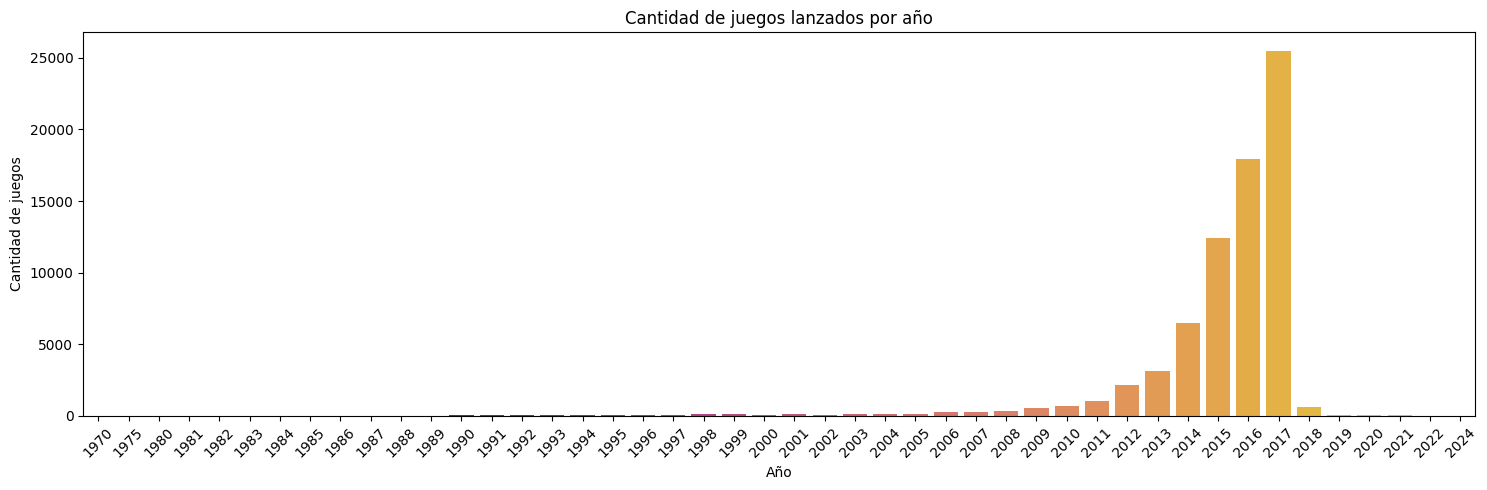

In [33]:
plt.figure(figsize=(15,5))

sns.barplot(x= steam_games['release_year'].value_counts().index.astype(int), y= steam_games['release_year'].value_counts().values, palette='plasma')

plt.title('Cantidad de juegos lanzados por año')

plt.xlabel('Año')

plt.ylabel('Cantidad de juegos')

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Distribución de juegos según genero:

In [35]:
steam_games['genres'].value_counts().sort_values(ascending=False).head(10)

genres
Indie           15858
Action          11319
Casual           8282
Adventure        8242
Strategy         6957
Simulation       6699
RPG              5479
Free to Play     2031
Early Access     1462
Sports           1257
Name: count, dtype: int64

Graficamos:

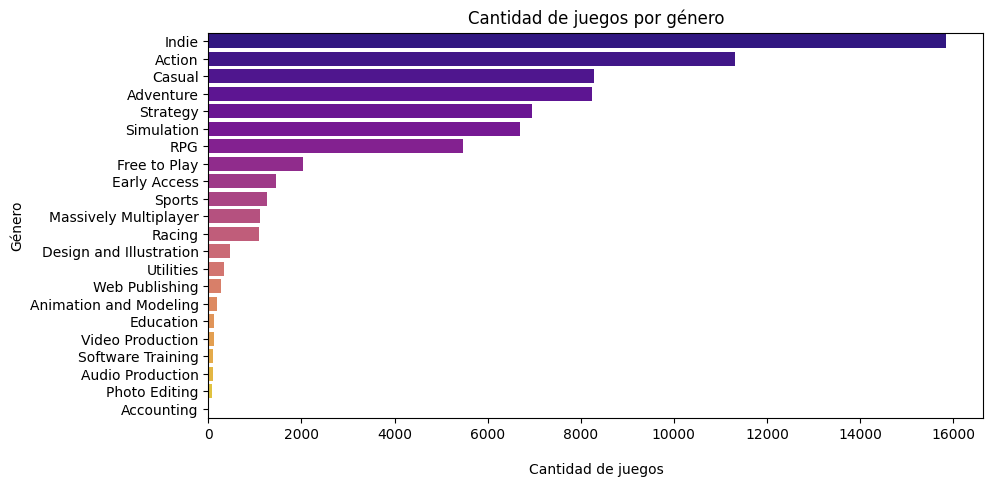

In [44]:
plt.figure(figsize=(10, 5))

sns.countplot(y=steam_games['genres'], order=steam_games['genres'].value_counts().index, palette='plasma')

plt.title('Cantidad de juegos por género')

plt.xlabel('\nCantidad de juegos')

plt.ylabel('Género')

plt.show()

Distribución de precios:

Obtenemos el precio para cada juego:

In [20]:
precios = steam_games.groupby('item_id')['price'].unique().reset_index().explode('price')

Nos quedamos solo con nuestros precios distintos a '--', ya que ese valor reemplaza a los valore nulos:

In [21]:
precios = precios[precios['price'] != '--']

Cambiamos el tipo de dato de la columna **price** a float:

In [22]:
precios['price'] = precios['price'].astype(float)

Graficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_20388\3256121030.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'plasma')


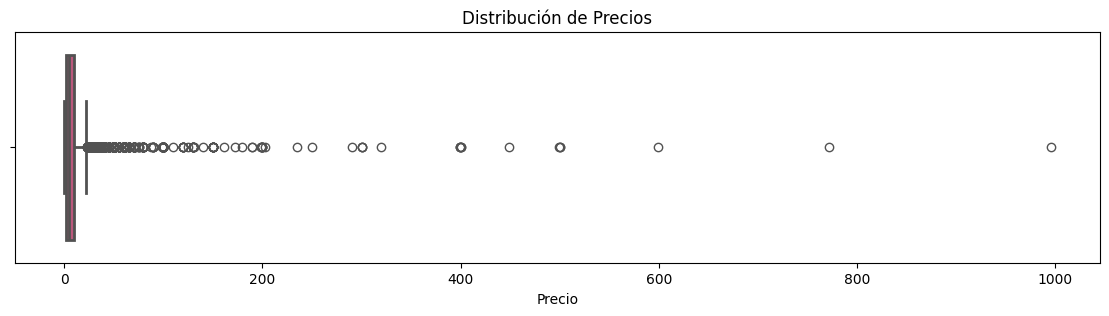

In [23]:
plt.figure(figsize = (14, 3))

sns.boxplot(x = 'price', data = precios, linewidth = 2, palette = 'plasma') 
plt.title('Distribución de Precios')
plt.xlabel('Precio')

plt.show()

Vemos claramente, la presencia de outliers. 

Estadistica descriptiva del DataFrame **precios**:

In [24]:
precios.describe()

,item_id,price
count,3.213200e+04,32132.000000
mean,4.517524e+05,8.514090
std,1.827147e+05,16.086051
min,1.000000e+01,0.000000
25%,3.292775e+05,1.990000
50%,4.520300e+05,4.990000
75%,5.933925e+05,9.990000
max,2.028850e+06,995.000000


Filtramos los precios, menores a 100, para ver mas en detalle:

In [25]:
precios_filter = precios[precios['price'] < 100]

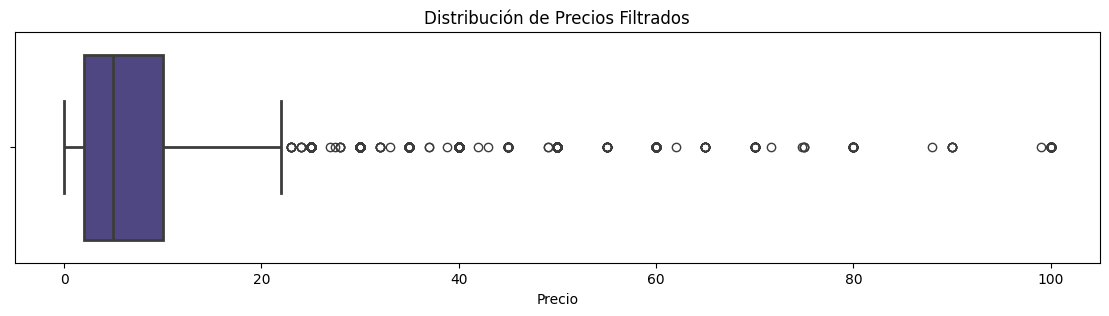

In [26]:
plt.figure(figsize = (14, 3))

sns.boxplot(x = 'price', data = precios_filter, linewidth = 2, color= 'darkslateblue') 
plt.title('Distribución de Precios Filtrados')
plt.xlabel('Precio')

plt.show()

Vemos que los outliers comienzan pasados los 20 USD. Asique procedemos a contarlos:

In [27]:
cantidad_outliers = (precios['price'] > 22).sum()

print(f'La cantidad de outliers es de: {cantidad_outliers}')

La cantidad de outliers es de: 1875


Vemos el porcentaje de outlires:

In [28]:
porcentaje_outlires = round((cantidad_outliers / (precios['price'].count())) * 100, 2)

print(f'El porcentaje de outliers es de: {porcentaje_outlires}%')

El porcentaje de outliers es de: 5.84%


Al ver la cantidad de outliers sobre el total de registros y el porcentaje de outliers, determinamos que estos, no modifican nuestro dataset. Hay juegos que pueden valer mas de 20 USD y llegar hasta los 200 USD, pero ya pasando ese monto, podemos clasificarlos como errores de registro o similares.

#### EDA dataset **user_reviews**

Información general:

In [29]:
user_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59305 entries, 0 to 59304
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   funny        8151 non-null   object 
 1   posted       49186 non-null  float64
 2   last_edited  6140 non-null   object 
 3   item_id      59305 non-null  int64  
 4   helpful      59305 non-null  object 
 5   recommend    59305 non-null  bool   
 6   review       59275 non-null  object 
 7   user_id      59305 non-null  object 
 8   user_url     59305 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 3.7+ MB


Porcentaje de nulos:

In [30]:
f.porcentaje_valores_nulos(user_reviews)

La columna funny tiene un  86.26 % de valores nulos
La columna posted tiene un  17.06 % de valores nulos
La columna last_edited tiene un  89.65 % de valores nulos
La columna item_id tiene un  0.00 % de valores nulos
La columna helpful tiene un  0.00 % de valores nulos
La columna recommend tiene un  0.00 % de valores nulos
La columna review tiene un  0.05 % de valores nulos
La columna user_id tiene un  0.00 % de valores nulos
La columna user_url tiene un  0.00 % de valores nulos


Vemos que las columnas **funny** y **last_edited**, tiene un porcentaje muy alto de nulos, asique las eliminamos:

In [31]:
user_reviews.drop(columns=['funny', 'last_edited'], inplace=True)

Estadistica descriptiva de variables numericas:

In [32]:
user_reviews.describe()

,posted,item_id
count,49186.000000,59305.000000
mean,2014.150205,169935.176511
std,0.841830,132029.464174
min,2010.000000,10.000000
25%,2014.000000,8930.000000
50%,2014.000000,218230.000000
75%,2015.000000,261760.000000
max,2015.000000,527340.000000


Estadistica descriptiva de variables categoricas:

In [33]:
columnas_object_reviews = user_reviews.select_dtypes(include=['object']).columns

In [34]:
df_reviews = user_reviews[columnas_object_reviews]

In [35]:
df_reviews.describe()

,helpful,review,user_id,user_url
count,59305,59275,59305,59305
unique,1344,55312,25458,25458
top,No ratings yet,good game,76561198094665607,http://steamcommunity.com/profiles/76561198094...
freq,30168,100,20,20


Vemos la cantidad de usuarios unicos:

In [36]:
user_reviews['user_id'].nunique()

25458

Distribución de recomendaciones hechas:

In [37]:
recommend = user_reviews['recommend'].value_counts()

recommend

recommend
True     52473
False     6832
Name: count, dtype: int64

Graficamos:

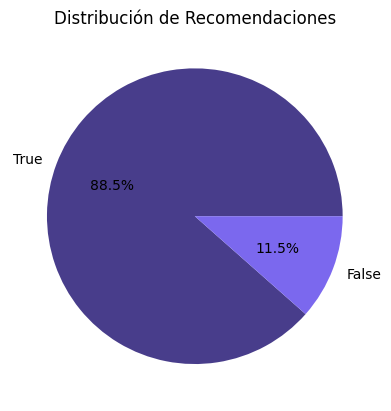

In [38]:
user_reviews['recommend'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue'])

plt.title('Distribución de Recomendaciones')
plt.axis('off')
plt.show()

Distribución de las categorias del Sentiment Analysis:

In [39]:
sentiment_analysis['sentiment_analysis'].value_counts()

sentiment_analysis
2    26266
1    24956
0     8083
Name: count, dtype: int64

Recordemos que las categorias siguen este patron:
- 0: Opiniones negativas
- 1: Opiniones neutras
- 2: Opiniones positivas

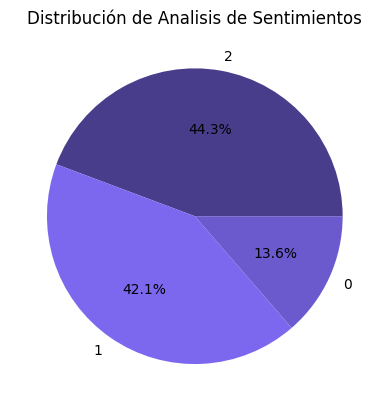

In [40]:
sentiment_analysis['sentiment_analysis'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['darkslateblue', 'mediumslateblue', 'slateblue'])

plt.title('Distribución de Analisis de Sentimientos')
plt.axis('off')
plt.show()

#### EDA dataset **user_items**

Información general:

In [41]:
user_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5094105 entries, 0 to 5094104
Data columns (total 8 columns):
 #   Column            Dtype 
---  ------            ----- 
 0   item_id           int64 
 1   item_name         object
 2   playtime_forever  int64 
 3   playtime_2weeks   int64 
 4   user_id           object
 5   items_count       int64 
 6   steam_id          int64 
 7   user_url          object
dtypes: int64(5), object(3)
memory usage: 310.9+ MB


Porcentaje de nulos por columna:

In [42]:
f.porcentaje_valores_nulos(user_items) 

La columna item_id tiene un  0.00 % de valores nulos
La columna item_name tiene un  0.00 % de valores nulos
La columna playtime_forever tiene un  0.00 % de valores nulos
La columna playtime_2weeks tiene un  0.00 % de valores nulos
La columna user_id tiene un  0.00 % de valores nulos
La columna items_count tiene un  0.00 % de valores nulos
La columna steam_id tiene un  0.00 % de valores nulos
La columna user_url tiene un  0.00 % de valores nulos


Estadistica descriptiva de variables númericas:

In [43]:
user_items.describe()

,item_id,playtime_forever,playtime_2weeks,items_count,steam_id
count,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06,5.094105e+06
mean,1.783916e+05,9.905511e+02,9.069004e+00,3.157324e+02,7.656120e+16
std,1.318516e+05,5.414297e+03,1.403145e+02,6.969073e+02,3.917652e+07
min,1.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,7.656120e+16
25%,3.445000e+04,0.000000e+00,0.000000e+00,7.100000e+01,7.656120e+16
50%,2.144200e+05,3.400000e+01,0.000000e+00,1.370000e+02,7.656120e+16
75%,2.664300e+05,3.550000e+02,0.000000e+00,2.750000e+02,7.656120e+16
max,5.307200e+05,6.427730e+05,1.996700e+04,7.762000e+03,7.656120e+16


Estadistica descriptiva de variables categoricas:

In [44]:
columnas_object_items = user_items.select_dtypes(include=['object']).columns

In [45]:
df_items = user_items[columnas_object_items]

In [46]:
df_items.describe()

,item_name,user_id,user_url
count,5094105,5094105,5094105
unique,10947,70912,70912
top,Dota 2 Test,phrostb,http://steamcommunity.com/id/phrostb
freq,49136,7762,7762


Vemos la cantidad de items unicos:

In [47]:
user_items['item_name'].nunique()

10947

Conteo de items por titulo:

In [48]:
user_items['item_name'].value_counts()


item_name
Dota 2 Test                               49136
Counter-Strike: Global Offensive          43336
Garry's Mod                               42849
Unturned                                  38278
Left 4 Dead 2 Beta                        36661
                                          ...  
Preston Sterling                              1
Happy Town People                             1
Kapsul Infinite                               1
Warhammer 40,000: Armageddon - Da Orks        1
Arachnophobia                                 1
Name: count, Length: 10947, dtype: int64

Vemos los usuarios con más horas jugadas:

In [49]:
user_by_time = user_items.groupby('user_id')['playtime_forever'].sum().sort_values(ascending=False)

Seleccionamos los 5 usuarios con más horas jugadas:

In [50]:
user_by_time = user_by_time.head(5)

Graficamos:

C:\Users\ferna\AppData\Local\Temp\ipykernel_20388\3459801855.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=user_by_time.index, y=user_by_time.values, palette='plasma')


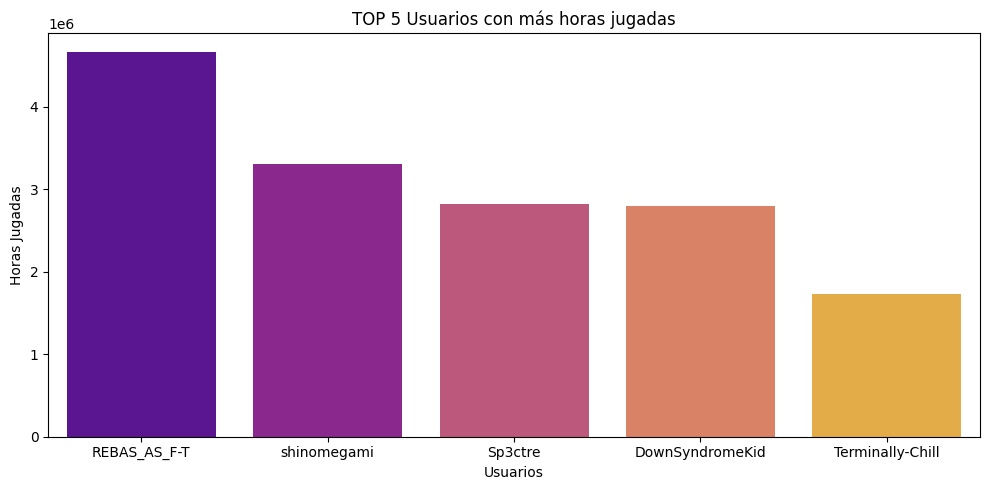

In [51]:
plt.figure(figsize=(10, 5))

sns.barplot(x=user_by_time.index, y=user_by_time.values, palette='plasma')
plt.title('TOP 5 Usuarios con más horas jugadas')
plt.xlabel('Usuarios')
plt.ylabel('Horas Jugadas')

plt.tight_layout()

plt.show()

Nube de palabras según aparición de **item_name**:

Contamos la cantidad de registros por **item_name**

In [52]:
aparicion_name = user_items['item_name'].value_counts().reset_index()

aparicion_name

,item_name,count
0,Dota 2 Test,49136
1,Counter-Strike: Global Offensive,43336
2,Garry's Mod,42849
3,Unturned,38278
4,Left 4 Dead 2 Beta,36661
...,...,...
10942,Preston Sterling,1
10943,Happy Town People,1
10944,Kapsul Infinite,1
10945,"Warhammer 40,000: Armageddon - Da Orks",1


Agregamos dos columnas nuevas, para crear un diccionario con la frecuencia de cada item

In [53]:
aparicion_name.columns = ['item', 'frecuencia']

In [54]:
aparicion_name

,item,frecuencia
0,Dota 2 Test,49136
1,Counter-Strike: Global Offensive,43336
2,Garry's Mod,42849
3,Unturned,38278
4,Left 4 Dead 2 Beta,36661
...,...,...
10942,Preston Sterling,1
10943,Happy Town People,1
10944,Kapsul Infinite,1
10945,"Warhammer 40,000: Armageddon - Da Orks",1


Creamos el diccionario:

In [55]:
dict_name = dict(zip(aparicion_name['item'], aparicion_name['frecuencia']))

Creamos el objeto Word Cloud

In [56]:
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Purples_r', max_words= 40)
wordcloud.generate_from_frequencies(dict_name)

Graficamos:

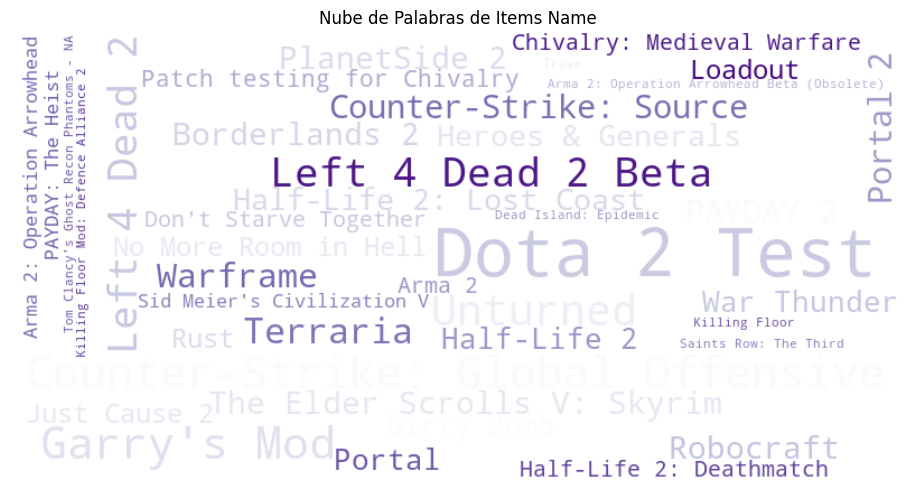

In [57]:
plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')
plt.title('Nube de Palabras de Items Name')
plt.tight_layout()
plt.show()